# From Joint Discrete Distribution to Percentiles

Often, in solving dynamic heterogeneous agent models, the state and choice spaces are discretized. We obtain as output from solving the model a discrete random variable with a vector of discrete random variable's values and another vector of probabilities. 

But we are often interested in distributional statistics such as percentiles of the distribution. 

If there are multiple outcomes/choices of interest, we might be additionally interested in the joint distribution of outcomes. 

The output discrete random variable vector might be sorted along the dimension of some vector, but not the other variables of interest. 

The function here: 
1. simulates random variables with many draws from joint discrete probability distribution 
2. computes various conditional, marginal, and joint distributional statistics. 

## Program

Graphing Program.

In [9]:
# Graphing Function, Multiple a-axis variables
ff_discrete_to_percentiles <- function(df, x.var,
                                       fill.var,
                                       out.var,
                                       subplot.var,
                                       it.fill.var.show.cnt = 3,
                                       it.subplot.var.show.cnt = 3,
                                       round = 3,
                                       ncol = 3,
                                       geom_type = 'line',
                                       st.caption = '',
                                       bl.lines.axis = FALSE,
                                       bl.lines.45 = FALSE,
                                       print=TRUE){


    return(list(plot=plot))
}

## Load Data

In [16]:
# Library
library(tidyverse)
library(AER)
library(R.matlab)
source('C:/Users/fan/R4Econ/dynamic/support/expandgrid.R')

# Load Sample Data
setwd('C:/Users/fan/R4Econ/_data/gda_small1/pm158/')
vf.matfile <- 'vf_az_p_gb_sa158_c1.mat'
vf.mat.out <- readMat(vf.matfile)

ds.matfile <- 'ds_az_p_gb_sa158_c1.mat'
ds.mat.out <- readMat(ds.matfile)

In [17]:
str(vf.mat.out)

List of 41
 $ MCOS          : raw [1:14] 63 6f 6e 74 ...
 $               : int [1:6, 1] -587202560 2 1 1 1 1
 $ MCOS          : raw [1:14] 63 6f 6e 74 ...
 $               : int [1:6, 1] -587202560 2 1 1 2 1
 $ mt.val        : num [1:250, 1:13] -1000 -1000 -952 -857 -729 ...
 $ mt.pol        : num [1:250, 1:13] -10 -9.78 -10 -9.56 -9.34 ...
 $ flag          : num [1, 1] 0
 $ it.z.n        : num [1, 1] 13
 $ ar.z          : num [1, 1:13] 0.0297 0.0489 0.0806 0.1329 0.2191 ...
 $ mt.z.trans    : num [1:13, 1:13] 0.279834 0.10565 0.02764 0.004893 0.000577 ...
 $ fl.w          : num [1, 1] 1
 $ fl.r          : num [1, 1] 0.025
 $ it.a.n        : num [1, 1] 250
 $ ar.a          : num [1, 1:250] -10 -9.78 -9.56 -9.34 -9.12 ...
 $ fl.crra       : num [1, 1] 2
 $ fl.beta       : num [1, 1] 0.95
 $ fl.rho        : num [1, 1] 0.8
 $ fl.sig        : num [1, 1] 0.6
 $ it.maxiter.val: num [1, 1] 5000
 $ fl.tol.val    : num [1, 1] 1e-06
 $ mt.val0       : num [1:250, 1:13] -1000 -1000 -952 -857 -72

In [30]:
str(ds.mat.out)

List of 29
 $ MCOS           : raw [1:14] 63 6f 6e 74 ...
 $                : int [1:6, 1] -587202560 2 1 1 1 1
 $ MCOS           : raw [1:14] 63 6f 6e 74 ...
 $                : int [1:6, 1] -587202560 2 1 1 2 1
 $ ar.dist.a      : num [1:250, 1] 0.001234 0.000465 0.000442 0.000529 0.000615 ...
 $ mt.dist.az     : num [1:250, 1:13] 2.07e-05 3.89e-06 4.88e-06 5.74e-06 6.75e-06 ...
 $ mt.pol         : num [1:250, 1:13] -10 -9.78 -10 -9.56 -9.34 ...
 $ flag           : num [1, 1] 0
 $ it.z.n         : num [1, 1] 13
 $ ar.z           : num [1, 1:13] 0.0297 0.0489 0.0806 0.1329 0.2191 ...
 $ mt.z.trans     : num [1:13, 1:13] 0.279834 0.10565 0.02764 0.004893 0.000577 ...
 $ it.a.n         : num [1, 1] 250
 $ ar.a           : num [1, 1:250] -10 -9.78 -9.56 -9.34 -9.12 ...
 $ it.maxiter.dist: num [1, 1] 5000
 $ fl.tol.dist    : num [1, 1] 1e-06
 $ fl.crra        : num [1, 1] 2
 $ fl.rho         : num [1, 1] 0.8
 $ fl.sig         : num [1, 1] 0.6
 $ D0             : num [1:250, 1:13] 2.07e-05

## Program Line by Line

In [31]:
# Vectors of States
ar.a <- vf.mat.out$ar.a
ar.z <- vf.mat.out$ar.z

# Outcome Matrix
mt.pol <- vf.mat.out$mt.pol
mt.val <- vf.mat.out$mt.val
mt.con <- vf.mat.out$mt.cons
mt.inc <- vf.mat.out$mt.incm

# Discrete Distribution
mt.dist <- ds.mat.out$D0

In [32]:
sum(mt.dist)

[1] 1

In [33]:
ar.st.vars <- c('a', 'z')
list.ar.fl <- list(ar.a, ar.z)
list.ts.valpolmat <- tibble(val=as.numeric(mt.pol),
                            pol=as.numeric(mt.val),
                            con=as.numeric(mt.con),
                            inc=as.numeric(mt.inc),
                            prob=as.numeric(mt.dist))
df.slds <- ff_dyna_sup_expand_grids(ar.st.vars, list.ar.fl, list.ts.valpolmat)

In [34]:
t(names(df.slds))

a,z,val,pol,con,inc,prob


In [35]:
summary(df.slds)

       a                 z                 val              pol            
 Min.   :-10.000   Min.   : 0.02965   Min.   :-10.00   Min.   :-1000.0000  
 1st Qu.:  3.695   1st Qu.: 0.13290   1st Qu.:  5.02   1st Qu.:   -0.9347  
 Median : 17.500   Median : 0.59560   Median : 18.49   Median :    6.2856  
 Mean   : 17.500   Mean   : 2.33525   Mean   : 18.38   Mean   :   -8.9161  
 3rd Qu.: 31.305   3rd Qu.: 2.66931   3rd Qu.: 31.97   3rd Qu.:    9.4507  
 Max.   : 45.000   Max.   :11.96302   Max.   : 45.00   Max.   :   12.4223  
      con                inc              prob          
 Min.   : 0.03039   Min.   :-9.999   Min.   :0.000e+00  
 1st Qu.: 0.96898   1st Qu.: 3.723   1st Qu.:2.234e-05  
 Median : 1.37541   Median :17.611   Median :9.843e-05  
 Mean   : 1.51560   Mean   :17.558   Mean   :3.077e-04  
 3rd Qu.: 1.71008   3rd Qu.:31.327   3rd Qu.:3.687e-04  
 Max.   :12.26210   Max.   :45.299   Max.   :3.247e-03  

In [36]:
str(df.slds)

Classes 'tbl_df', 'tbl' and 'data.frame':	3250 obs. of  7 variables:
 $ a   : num  -10 -9.78 -9.56 -9.34 -9.12 ...
 $ z   : num  0.0297 0.0297 0.0297 0.0297 0.0297 ...
 $ val : num  -10 -9.78 -10 -9.56 -9.34 ...
 $ pol : num  -1000 -1000 -952 -857 -729 ...
 $ con : num  0.0304 0.0304 0.4722 0.2513 0.2513 ...
 $ inc : num  -10 -9.78 -9.56 -9.34 -9.12 ...
 $ prob: num  2.07e-05 3.89e-06 4.88e-06 5.74e-06 6.75e-06 ...
 - attr(*, "out.attrs")=List of 2
  ..$ dim     : int  250 13
  ..$ dimnames:List of 2
  .. ..$ Var1: chr  "Var1=-10.00000000" "Var1= -9.77911647" "Var1= -9.55823293" "Var1= -9.33734940" ...
  .. ..$ Var2: chr  "Var2= 0.02965337" "Var2= 0.04889014" "Var2= 0.08060622" "Var2= 0.13289718" ...


In [38]:
sum(df.slds$prob)
sum(df.slds$prob/sum(df.slds$prob))

[1] 1

[1] 1

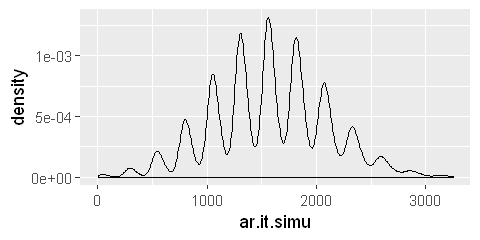

In [47]:
it.sample.draws <- 100000
ar.it.simu = sample(dim(df.slds)[1], it.sample.draws, replace = TRUE,
                    prob = (df.slds$prob/sum(df.slds$prob)));
# z = hist(df.slds$, plot=FALSE) 
options(repr.plot.width = 4, repr.plot.height = 2)
tibble(ar.it.simu=ar.it.simu) %>% ggplot(aes(x=ar.it.simu)) + geom_density()

In [15]:
ar.st.vars <- c('a', 'z')
list.ar.fl <- list(ar.a, ar.z)
list.ts.valpolmat <- tibble(val=as.numeric(mt.val), pol=as.numeric(mt.pol))
df.solu <- ff_dyna_sup_expand_grids(ar.st.vars, list.ar.fl, list.ts.valpolmat)

options(repr.matrix.max.rows=500, repr.matrix.max.cols=20)
options(repr.plot.width = 10, repr.plot.height = 4)
plot <- ff_dyna_sup_grid_out_graph(df=df.solu, x.var='a', fill.var='z', out.var='val', it.fill.var.show.cnt=5)
options(repr.plot.width = 10, repr.plot.height = 4)
plot <- ff_dyna_sup_grid_out_graph(df=df.solu, x.var='a', fill.var='z', out.var='pol', it.fill.var.show.cnt=5)

ERROR: Error in eval_tidy(xs[[i]], unique_output): object 'mt.val' not found
